**Introduction to Turing**

Using coin flips

In [3]:
using Random, Plots, Distributions

In [14]:
p_true = 0.5 #probability of getting heads
N = 0:100 #100 flips
Random.seed!(12)

data = rand(Bernoulli(p_true), last(N)) #draw from Bernoulli distribution
prior_belief = Beta(1,1) #prior belief of probability of getting heads

Beta{Float64}(α=1.0, β=1.0)

┌ Info: Saved animation to 
│   fn = /home/sahil/julia/learn-julia/tmp.gif
└ @ Plots /home/sahil/.julia/packages/Plots/zOV0T/src/animation.jl:104


Plots.AnimatedGif("/home/sahil/julia/learn-julia/tmp.gif")
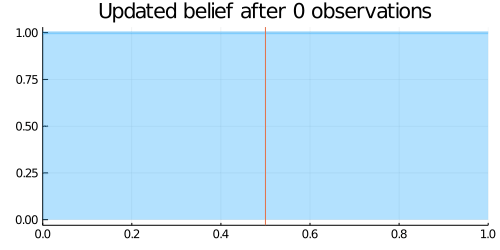

In [15]:
using StatsPlots

#The animation demonstrates that with increasing evidence our prior belief adjusts to the true probability
animation = @gif for (i, n) in enumerate(N)
    heads = sum(data[1:i-1])
    tails = n - heads
    updated_belief = Beta(prior_belief.α + heads, prior_belief.β + tails)
    plot(updated_belief, size = (500, 250), title = "Updated belief after $n observations",
        xlabel = "", ylabel = "", legend = nothing, xlim = (0,1), fill=0, α=0.3, w=3)
    vline!([p_true])
end

Note that the prior distribution had a convenient closed form expression, which not all models have. 

Enter *Turing*, a universal probabilistic programming system in Julia `(Turing.jl)`
with intuitive modeling syntex and support for many sampling-based inference algorithms

In [17]:
using Turing, MCMCChains #The Turing library and Markov Chain Monte Carlo simulations

In [18]:
# Defining the model
@model coinflip(y) = begin
    p ~ Beta(1, 1) # prior belief in probability of getting heads
    N = length(y)
    for n in 1:N
        y[n] ~ Bernoulli(p) # results of coin flip from Bernoulli distribution
    end
end;

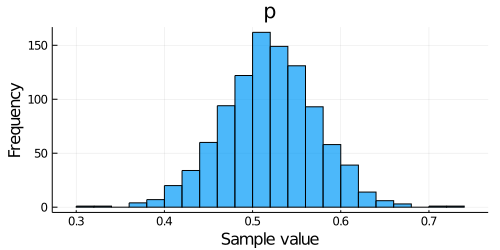

In [19]:
# Approximate the posterior distribution by drawing samples
iterations = 1000
ϵ = 0.05
τ = 10
chain = sample(coinflip(data), HMC(ϵ, τ), iterations, progress=false) # Hamiltonian Monte Carlo sampler

#Construct summary of sampling process for probability of getting heads
p_summary = chain[:p]
plot(p_summary, seriestype= :histogram)

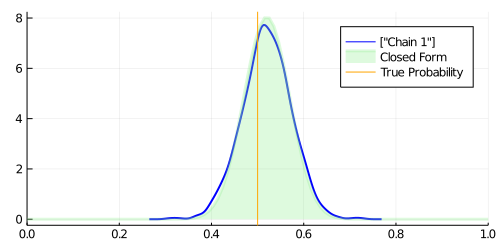

In [20]:
#Compare this to closed form solution and true probability
N = length(data)
heads = sum(data)
updated_belief = Beta(prior_belief.α + heads, prior_belief.β + (N - heads))

p = plot(p_summary, seriestype = :density, xlim=(0,1), legend = :best, w=2, c = :blue)
r = range(0, stop=1, length=100)
plot!(p, r, pdf.(Ref(updated_belief), r), xlabel="", ylabel="", title="",
      xlim=(0,1), label="Closed Form", fill=0, α=0.3, w=3, c=:lightgreen)
vline!(p, [p_true], label="True Probability", c=:orange)

**Gaussian Mixture Models**